In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling

In [2]:
train_dt = pd.read_csv('train-data.csv')

In [3]:
train_dt.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
train_dt.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
train_dt.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [7]:
test_dt = pd.read_csv('test-data.csv')

In [8]:
test_dt.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [9]:
test_dt.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')

In [10]:
test_dt.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
New_Price            182 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [12]:
train_dt.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [13]:
#EDA using pandas profiling
prof_rep = pandas_profiling.ProfileReport(train_dt)

E:\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [14]:
prof_rep.to_file('carreport.html')

## Observations from Profile Report
### Name has a high cardinality: 1876 distinct values
### Kilometers_Driven is highly skewed (γ1 = 58.725) 
### Mileage has a high cardinality: 443 distinct values 
### Engine has a high cardinality: 147 distinct values 
### Power has a high cardinality: 373 distinct values 
### New_Price has 5195 / 86.3% missing values
### New_Price has a high cardinality: 541 distinct values

In [15]:
#Dropping New_Price
train_dt.drop(['New_Price'],axis=1,inplace=True)
test_dt.drop(['New_Price'],axis=1,inplace=True)

In [16]:
train_dt.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [17]:
train_dt.Name.value_counts()

Mahindra XUV500 W8 2WD                       49
Maruti Swift VDI                             45
Honda City 1.5 S MT                          34
Maruti Swift Dzire VDI                       34
Maruti Swift VDI BSIV                        31
                                             ..
Mercedes-Benz S Class 2005 2013 320 CDI       1
Mercedes-Benz New C-Class 250 CDI Classic     1
Tata Tigor 1.05 Revotorq XZ Option            1
Mercedes-Benz GLC 220d 4MATIC Sport           1
Mahindra Xylo E8 BS IV                        1
Name: Name, Length: 1876, dtype: int64

In [18]:
train_dt.Name.values

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Mahindra Xylo D4 BSIV', 'Maruti Wagon R VXI',
       'Chevrolet Beat Diesel'], dtype=object)

In [19]:
train_dt.Kilometers_Driven

0        72000
1        41000
2        46000
3        87000
4        40670
         ...  
6014     27365
6015    100000
6016     55000
6017     46000
6018     47000
Name: Kilometers_Driven, Length: 6019, dtype: int64

In [20]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [21]:
manufacturer = train_dt['Name'].str.split(' ',expand = True)

In [22]:
train_dt['Brand'] = manufacturer[0]

In [23]:
manufacturer_test = test_dt['Name'].str.split(' ',expand = True)
test_dt['Brand'] = manufacturer_test[0]

Text(0, 0.5, 'Count of cars')

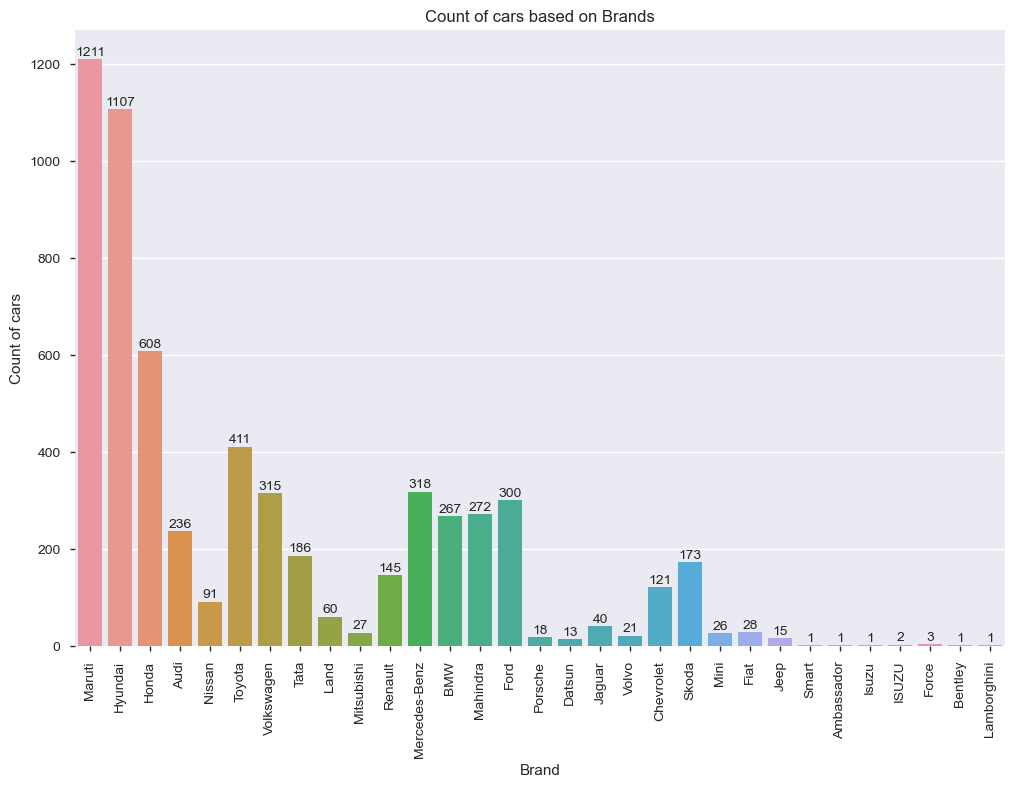

In [24]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Brand', data = train_dt)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Brands")
plt.xlabel("Brand")
plt.ylabel("Count of cars")

### Clearly Maruthi has max. count and Hyundai is in second

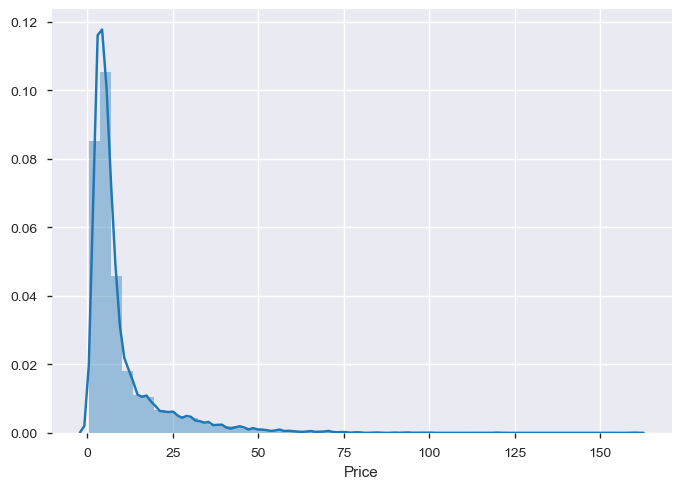

In [25]:
sns.distplot(a=train_dt.Price)

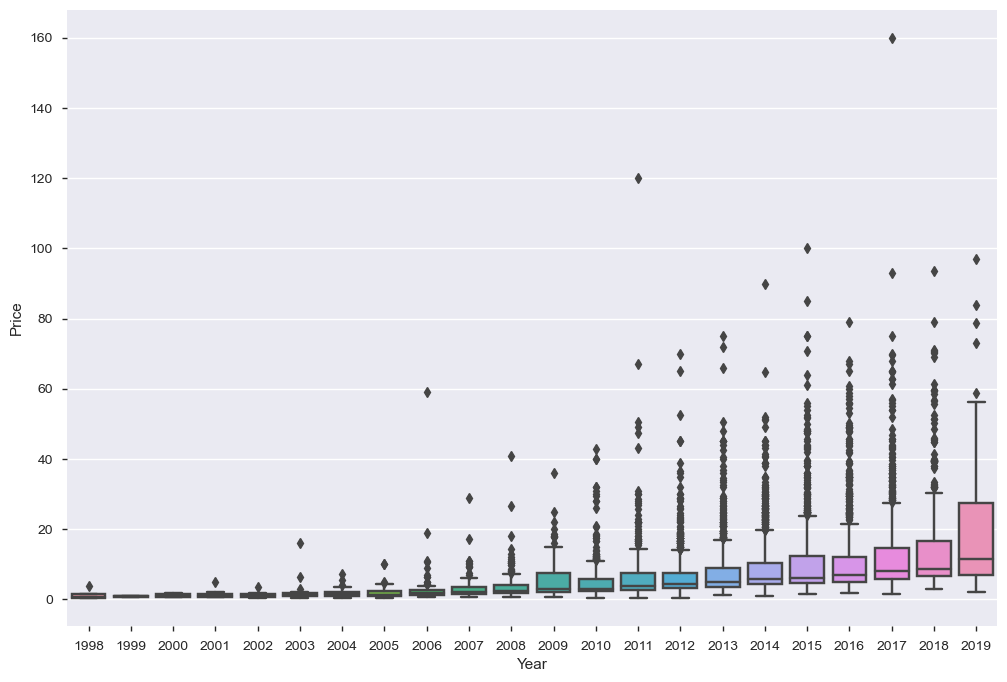

In [26]:
plt.figure(figsize = (12, 8))
sns.boxplot(x=train_dt.Year,y=train_dt.Price)

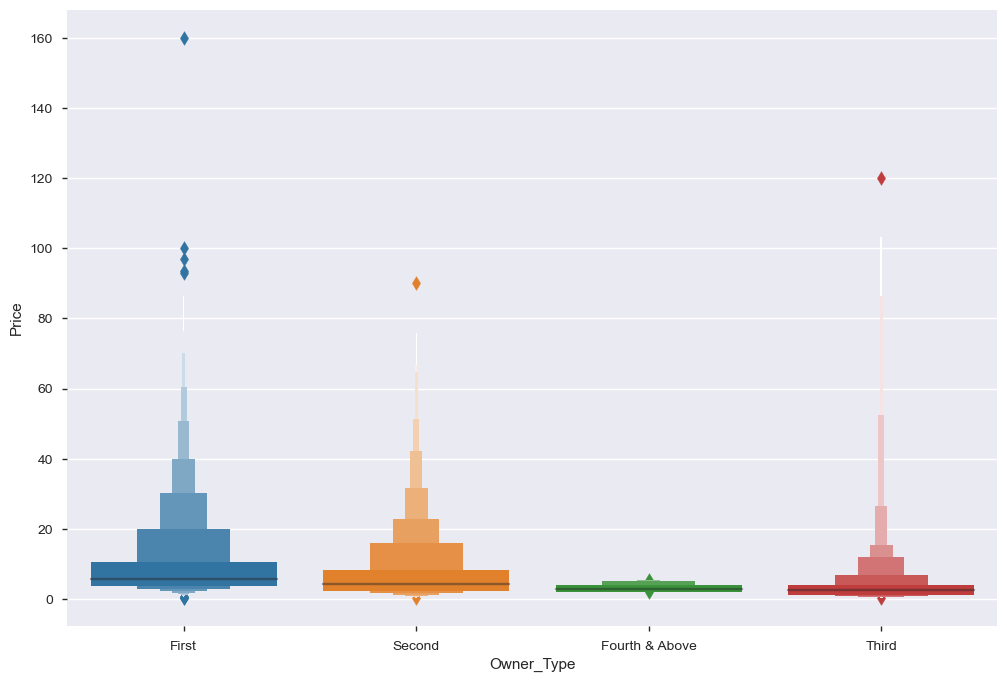

In [27]:
plt.figure(figsize = (12, 8))
sns.boxenplot(x=train_dt.Owner_Type,y=train_dt.Price)

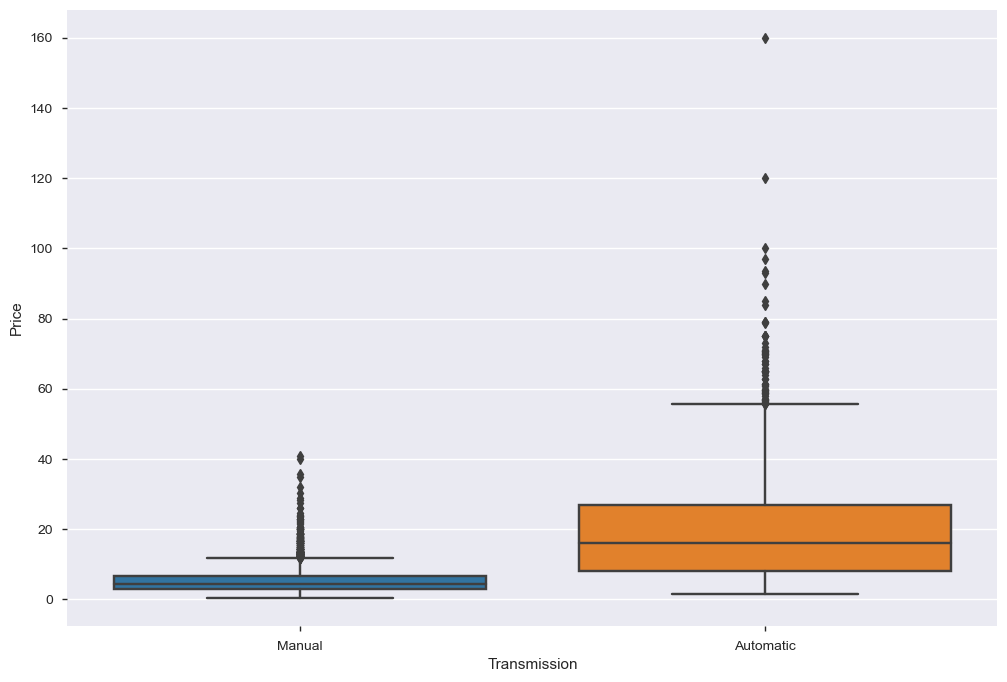

In [28]:
plt.figure(figsize = (12, 8))
sns.boxplot(x=train_dt.Transmission,y=train_dt.Price)

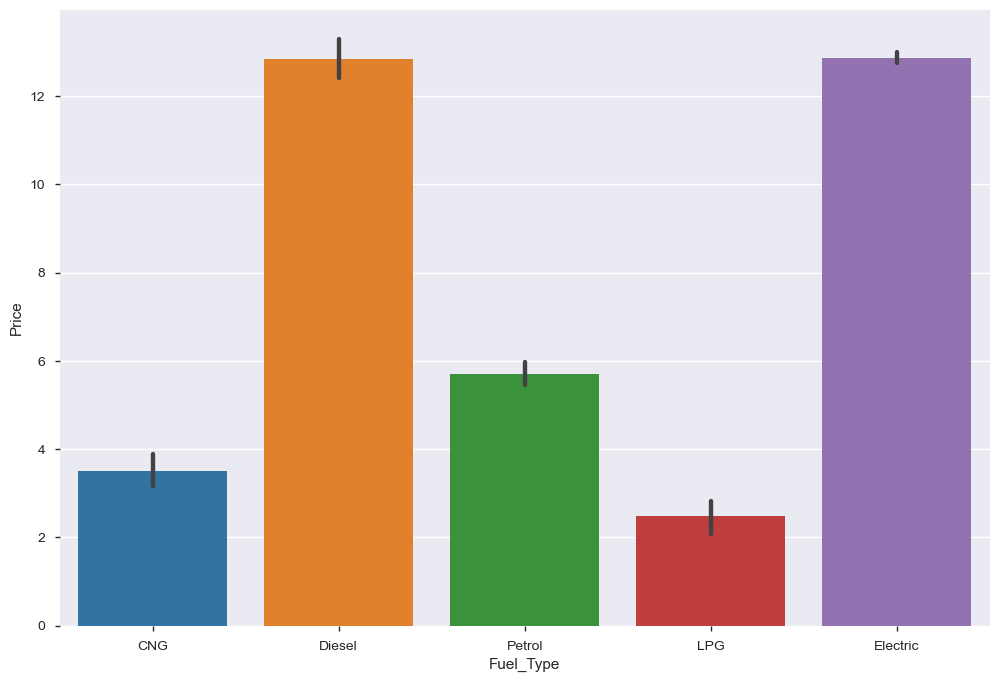

In [30]:
plt.figure(figsize = (12, 8))
sns.barplot(x=train_dt.Fuel_Type,y=train_dt.Price)

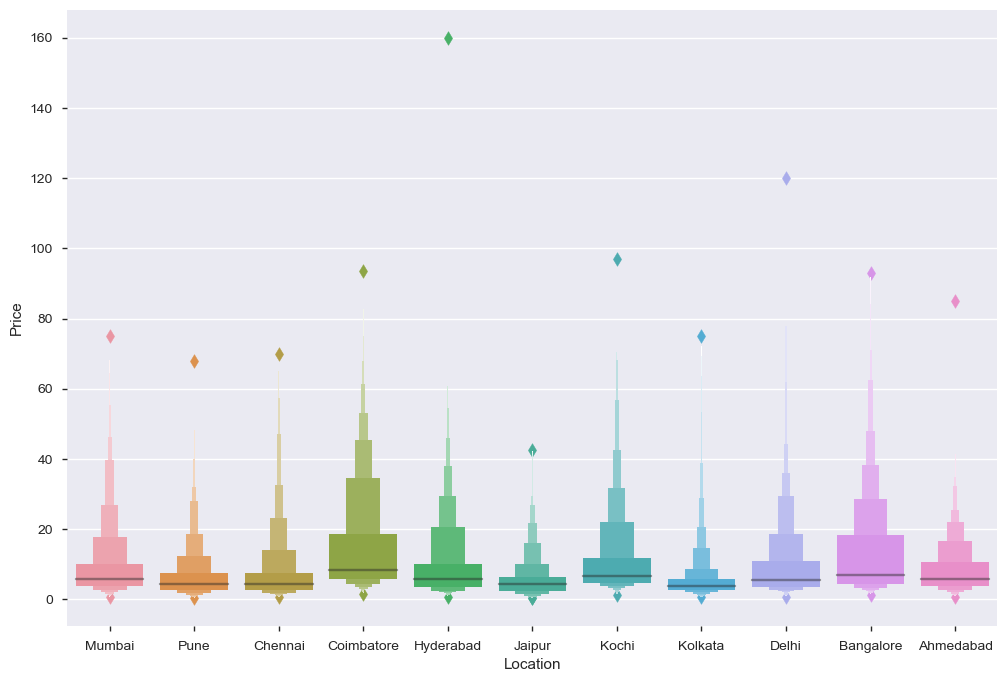

In [31]:
plt.figure(figsize = (12, 8))
sns.boxenplot(x=train_dt.Location,y=train_dt.Price)

In [32]:
train_dt.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
dtype: int64

In [33]:
train_dt['Engine']=train_dt.Engine.str.split(' ',expand = True)[0]
test_dt['Engine']=test_dt.Engine.str.split(' ',expand = True)[0]

In [34]:
train_dt['Power'] = train_dt.Power.str.split(' ',expand = True)[0]
test_dt['Power']=test_dt.Power.str.split(' ',expand = True)[0]

In [35]:
train_dt['Mileage'] = train_dt.Mileage.str.split(' ',expand = True)[0]
test_dt['Mileage']=test_dt.Mileage.str.split(' ',expand = True)[0]

In [36]:
train_dt.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi


In [37]:
test_dt.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0,Maruti
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0,Maruti
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0,Toyota
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null,5.0,Toyota
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0,Hyundai


In [38]:
#Dropping unwanted variables
train_dt.drop(['Name'],axis=1,inplace=True)
test_dt.drop(['Name'],axis=1,inplace=True)

In [39]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
Brand                6019 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [40]:
#Null Values imputation
train_dt['Seats']=train_dt.Seats.fillna(train_dt.Seats.median())

In [41]:
#Has special values of 'null' instead of NA
train_dt.loc[train_dt.Power=='null']

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
76,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399,null,5.0,2.00,Ford
79,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086,null,5.0,1.30,Hyundai
89,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086,null,5.0,2.10,Hyundai
120,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086,null,5.0,0.85,Hyundai
143,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086,null,5.0,1.67,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Pune,2006,47200,Petrol,Manual,Second,17.0,1086,null,5.0,1.20,Hyundai
5893,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061,null,5.0,1.75,Maruti
5925,Pune,2010,85000,Petrol,Manual,First,17.5,1798,null,5.0,2.85,Skoda
5943,Chennai,2002,75000,Diesel,Manual,First,0.0,2112,null,6.0,1.70,Mahindra


In [42]:
#Converting 'null' to ''NA'
for i in range(train_dt.shape[0]):
    if train_dt['Power'][i]=='null':
        train_dt['Power'][i]=np.nan

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
train_dt['Power']=train_dt.Power.fillna(train_dt.Power.median())

In [44]:
train_dt['Power']=train_dt.Power.astype('float64')

In [45]:
train_dt['Engine']=train_dt.Engine.fillna(train_dt.Engine.median())

In [46]:
train_dt['Engine']=train_dt.Engine.astype('int64')

In [47]:
train_dt['Mileage']= train_dt.Mileage.fillna(train_dt.Mileage.median())

In [48]:
train_dt['Mileage']=train_dt.Mileage.astype('float64')

In [49]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null int64
Power                6019 non-null float64
Seats                6019 non-null float64
Price                6019 non-null float64
Brand                6019 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 564.4+ KB


In [50]:
# handling null for test data
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
Brand                1234 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [51]:
test_dt['Engine'] = test_dt.Engine.fillna(test_dt.Engine.median())

In [52]:
test_dt['Engine']=test_dt.Engine.astype('int64')

In [53]:
for i in range(test_dt.shape[0]):
    if test_dt['Power'][i]=='null':
        test_dt['Power'][i]=np.nan

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
test_dt['Power'] = test_dt.Power.fillna(test_dt.Power.median())

In [55]:
test_dt['Power']=test_dt.Power.astype('float64')

In [56]:
test_dt['Seats'] = test_dt.Seats.fillna(test_dt.Seats.median())

In [57]:
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1234 non-null int64
Power                1234 non-null float64
Seats                1234 non-null float64
Brand                1234 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 106.2+ KB


In [58]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null int64
Power                6019 non-null float64
Seats                6019 non-null float64
Price                6019 non-null float64
Brand                6019 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 564.4+ KB


In [59]:
#Create dummys for categorical variables
cat_vars=['Location','Fuel_Type','Transmission','Owner_Type','Brand']

In [60]:
train_cat=train_dt[cat_vars]

In [61]:
train_cat=pd.get_dummies(train_cat,drop_first=True)

In [62]:
train_cat.rename(columns={'Owner_Type_Fourth & Above':'Owner_Type_Fourth_&_Above'},inplace=True)

In [63]:
train_cat.columns

Index(['Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Fourth_&_Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet',
       'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Smart', 'Brand_Tata', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo'],
      dtype='object')

In [64]:
train_dt = pd.concat([train_dt,train_cat],axis=1)

In [65]:
train_dt.drop(['Location','Fuel_Type','Transmission','Owner_Type','Brand'],axis=1,inplace=True)

In [66]:
train_dt.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.60,998,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582,126.20,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968,140.80,5.0,17.74,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 55 columns):
Year                         6019 non-null int64
Kilometers_Driven            6019 non-null int64
Mileage                      6019 non-null float64
Engine                       6019 non-null int64
Power                        6019 non-null float64
Seats                        6019 non-null float64
Price                        6019 non-null float64
Location_Bangalore           6019 non-null uint8
Location_Chennai             6019 non-null uint8
Location_Coimbatore          6019 non-null uint8
Location_Delhi               6019 non-null uint8
Location_Hyderabad           6019 non-null uint8
Location_Jaipur              6019 non-null uint8
Location_Kochi               6019 non-null uint8
Location_Kolkata             6019 non-null uint8
Location_Mumbai              6019 non-null uint8
Location_Pune                6019 non-null uint8
Fuel_Type_Diesel             6019 non-null uint8
Fue

In [68]:
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1234 non-null int64
Power                1234 non-null float64
Seats                1234 non-null float64
Brand                1234 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 106.2+ KB


In [69]:
test_dt['Mileage']=test_dt.Mileage.astype('float64')

In [70]:
cat_vars

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']

In [71]:
test_cat=test_dt[cat_vars]

In [72]:
test_cat=pd.get_dummies(test_cat,drop_first=True)

In [73]:
test_cat.rename(columns={'Owner_Type_Fourth & Above':'Owner_Type_Fourth_&_Above'},inplace=True)

In [74]:
test_dt = pd.concat([test_dt,test_cat],axis=1)

In [75]:
test_dt.drop(['Location','Fuel_Type','Transmission','Owner_Type','Brand'],axis=1,inplace=True)

In [76]:
#Columns present in Train Data but not present in test data
#Adding them to test data and setting value as 0
missing_cols = set(train_dt.columns) - set(test_dt.columns)
for col in missing_cols:
    test_dt[col] = 0
test_dt = test_dt[train_dt.columns]
print(missing_cols)

{'Brand_Force', 'Brand_Lamborghini', 'Price', 'Fuel_Type_Electric', 'Brand_Smart', 'Brand_Audi'}


In [77]:
test_dt.drop(['Price'],axis=1,inplace=True)

In [78]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [79]:
X=train_dt.drop(['Price'],axis=1)
y=train_dt.Price

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)

In [81]:
xgb = xgb.XGBRegressor()

In [82]:
xgb.fit(X_train,y_train)

E:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:12:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [83]:
y_pred = xgb.predict(X_test)

In [84]:
y_pred

array([20.437973 ,  9.013727 ,  5.795584 , ...,  8.310892 ,  5.57072  ,
        1.1192687], dtype=float32)

In [85]:
xgb.score(X_test,y_test)

0.903512966453823

In [86]:
#Predicting prices for test data
pred = xgb.predict(test_dt)

In [87]:
test_dt['Predicted_Price'] = pred

In [88]:
test_dt.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Predicted_Price
0,2014,40929,32.26,998,58.20,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.585451
1,2013,54493,24.70,796,47.30,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.338708
2,2017,34000,13.68,2393,147.80,7.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,16.928181
3,2012,139000,23.59,1364,93.70,5.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5.924044
4,2014,29000,18.50,1197,82.85,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.483815


In [89]:
final_submission = pd.read_csv('test-data.csv')

In [90]:
final_submission['Predicted_Price']=test_dt.Predicted_Price

In [91]:
final_submission.to_csv('final_submission.csv')